In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import math
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

%matplotlib inline

C:\Users\Luan Brasil\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [74]:
df = pd.read_csv('train.csv')
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [75]:
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(categorical_features=[0])

In [76]:
df_test = pd.read_csv('test.csv')

In [77]:
X_test_2 = df_test[['TP_SEXO', 'TP_ANO_CONCLUIU', 'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_SURDEZ', 'NU_NOTA_CN', 'NU_NOTA_CH',
        'NU_NOTA_LC', 'NU_NOTA_REDACAO']]
X_test_2.iloc[:, 0] = label_encoder.fit_transform(X_test_2.iloc[:, 0])
X_test_2.fillna(0.0, inplace=True)

C:\Users\Luan Brasil\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\Luan Brasil\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [78]:
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


In [79]:
notas = df['NU_NOTA_MT']
notas.fillna(0.0, inplace=True)

In [80]:
notas = pd.to_numeric(notas, errors='coerce').fillna(0.0)

In [81]:
X = df[['TP_SEXO', 'TP_ANO_CONCLUIU', 'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_SURDEZ', 'NU_NOTA_CN', 'NU_NOTA_CH',
        'NU_NOTA_LC', 'NU_NOTA_REDACAO']]
X.fillna(0.0, inplace=True)

C:\Users\Luan Brasil\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [82]:
X.iloc[:, 0] = label_encoder.fit_transform(X.iloc[:, 0])

C:\Users\Luan Brasil\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, notas, test_size=0.4, random_state=101)

In [93]:
lm = LinearRegression()

In [94]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
test_predictions = lm.predict(X_test)
test_predictions

array([422.41932357, 463.54032283, 431.9404382 , ..., 469.27012955,
       -12.51230332, 494.23240713])

In [96]:
predictions = lm.predict(X_test_2)
predictions

array([410.99368609, 473.01681199, 571.88115404, ..., 606.19001192,
       505.09517058,  12.43390242])

In [97]:
df_inscr = pd.DataFrame(df_test['NU_INSCRICAO'], columns=['NU_INSCRICAO'])
df_predictions = pd.DataFrame(predictions, columns=['NU_NOTA_MT'])

C:\Users\Luan Brasil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Luan Brasil\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


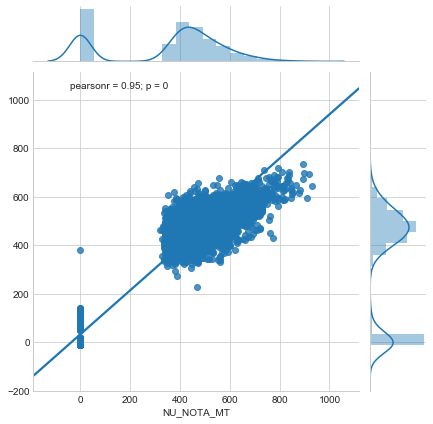

In [125]:
sns.set_style('whitegrid')
sns.jointplot(x=y_test, y=test_predictions, data=df, kind='reg')

C:\Users\Luan Brasil\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Luan Brasil\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


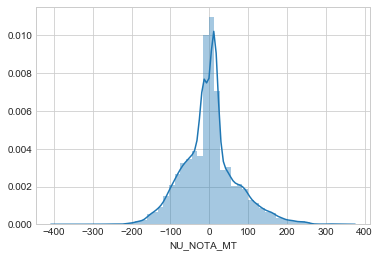

In [124]:
sns.distplot((y_test-test_predictions), bins=50)

In [126]:
answers = pd.concat([df_inscr, df_predictions], axis=1)
answers.to_csv('answers.csv', index_label=False)
x = pd.read_csv('answers.csv', sep=',')

In [127]:
x

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,410.993686
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,473.016812
2,b38a03232f43b11c9d0788abaf060f7366053b6d,571.881154
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,-13.610822
4,715494628a50142ce8cb17191cfe6d0f3cae0934,558.448224
5,e656d6bad65c93fb2880f1eba5037008c8e75774,493.727289
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,528.437897
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,402.602733
8,043c544a2104aa8a9849f1a703a08d37a2f16839,486.781936
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,479.523521
